In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tqdm import tqdm
# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [2]:
# raw_dataset = pd.read_csv("/data/fast0/datasets/glathida-3.1.0/data/T.csv")

print("importing data")
T_dataset = pd.read_csv("/home/sa42/data/glac/T_models/T.csv")
TT_dataset = pd.read_csv("/home/sa42/data/glac/T_models/TT.csv")
TTT_dataset = pd.read_csv("/home/sa42/data/glac/T_models/TTT.csv")


# T_dataset = pd.read_csv("~/stuff/coding/glacier/data/T.csv")
# TT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TT.csv")
# TTT_dataset = pd.read_csv("~/stuff/coding/glacier/data/TTT.csv")

print("sorting data")
T_dataset = T_dataset.drop("GLACIER_DB", axis=1)
T_dataset = T_dataset.drop("POLITICAL_UNIT", axis=1)
T_dataset = T_dataset.drop("GLACIER_ID", axis=1)
T_dataset = T_dataset.drop("GLACIER_NAME", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_POINTS", axis=1)
T_dataset = T_dataset.drop("NUMBER_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("TOTAL_LENGTH_OF_SURVEY_PROFILES", axis=1)
T_dataset = T_dataset.drop("INTERPOLATION_METHOD", axis=1)
T_dataset = T_dataset.drop("INVESTIGATOR", axis=1)
T_dataset = T_dataset.drop("SPONSORING_AGENCY", axis=1)
T_dataset = T_dataset.drop("ELEVATION_DATE", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD_DETAILS", axis=1)
T_dataset = T_dataset.drop("SURVEY_METHOD", axis=1)
T_dataset = T_dataset.drop("SURVEY_DATE", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS", axis=1)
T_dataset = T_dataset.drop("AREA", axis=1)
T_dataset = T_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("MAXIMUM_THICKNESS", axis=1)
T_dataset = T_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
T_dataset = T_dataset.drop("DATA_FLAG", axis=1)
T_dataset = T_dataset.drop("REMARKS", axis=1)
T_dataset = T_dataset.drop("REFERENCES", axis=1)
T_dataset = T_dataset.drop("MEAN_SLOPE", axis=1)
T_dataset = T_dataset.dropna()

TT_dataset = TT_dataset.drop("POLITICAL_UNIT", axis=1)
TT_dataset = TT_dataset.drop("GLACIER_NAME", axis=1)
TT_dataset = TT_dataset.drop("SURVEY_DATE", axis=1)
TT_dataset = TT_dataset.drop("MEAN_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("MAXIMUM_THICKNESS", axis=1)
TT_dataset = TT_dataset.drop("MAX_THICKNESS_UNCERTAINTY", axis=1)
TT_dataset = TT_dataset.drop("DATA_FLAG", axis=1)
TT_dataset = TT_dataset.drop("REMARKS", axis=1)
TT_dataset = TT_dataset.dropna()


TTT_dataset = TTT_dataset.drop("POLITICAL_UNIT", axis=1)
TTT_dataset = TTT_dataset.drop("GLACIER_NAME", axis=1)
TTT_dataset = TTT_dataset.drop("SURVEY_DATE", axis=1)
TTT_dataset = TTT_dataset.drop("PROFILE_ID", axis=1)
TTT_dataset = TTT_dataset.drop("THICKNESS_UNCERTAINTY", axis=1)
TTT_dataset = TTT_dataset.drop("DATA_FLAG", axis=1)
TTT_dataset = TTT_dataset.drop("REMARKS", axis=1)
TTT_dataset = TTT_dataset.drop("POINT_ID", axis=1)
TTT_dataset = TTT_dataset.dropna()


T = pd.DataFrame(T_dataset)
T.rename(columns = {"LAT":"LAT_CENT",
                    "LON":"LON_CENT",
                    "AREA":"T_AREA"},
         inplace = True)

TT = pd.DataFrame(TT_dataset)
TT.rename(columns = {"LOWER_BOUND":"TT_LOWER_BOUND",
                     "UPPER_BOUND":"TT_UPPER_BOUND",
                     "AREA":"TT_AREA",
                     "MEAN_SLOPE":"TT_MEAN_SLOPE",
                     "MEAN_THICKNESS":"TT_MEAN_THICKNESS"},
          inplace = True)

TTT = pd.DataFrame(TTT_dataset)
TTT.rename(columns = {"ELEVATION":"POINT_ELEVATION",
                      "THICKNESS":"POINT_THICKNESS"},
           inplace = True)

TTT_plu = pd.merge(T, TTT, how="inner", on=["GlaThiDa_ID"])

TTT_plus = pd.merge(TT,TTT_plu, how="inner", on=["GlaThiDa_ID"])

TTT_plus

importing data


/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


sorting data


,GlaThiDa_ID,TT_LOWER_BOUND,TT_UPPER_BOUND,TT_AREA,TT_MEAN_SLOPE,TT_MEAN_THICKNESS,LAT_CENT,LON_CENT,POINT_LAT,POINT_LON,POINT_ELEVATION,POINT_THICKNESS
0,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960842,9.390133,2624.0,15
1,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960844,9.390126,2625.0,15
2,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960847,9.390118,2625.0,15
3,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960849,9.390111,2625.0,14
4,362,2600,2650,0.01985,24.0,14,46.9595,9.3891,46.960851,9.390103,2624.0,14
...,...,...,...,...,...,...,...,...,...,...,...,...
166422,2100,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235309,97.762576,4780.0,90
166423,2100,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235217,97.762203,4780.0,101
166424,2100,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235171,97.761845,4780.0,106
166425,2100,5100,5200,0.01600,32.0,0,39.2370,97.7550,39.235114,97.761459,4782.0,112


In [3]:
# print(len(TTT_plus["GLACIER_NAME"].unique()))

In [4]:
# TTT_plus.dropna()
TTT_plus.isna().sum()
TTT_plus.dropna()
TTT_plus.isna().sum()

GlaThiDa_ID          0
TT_LOWER_BOUND       0
TT_UPPER_BOUND       0
TT_AREA              0
TT_MEAN_SLOPE        0
TT_MEAN_THICKNESS    0
LAT_CENT             0
LON_CENT             0
POINT_LAT            0
POINT_LON            0
POINT_ELEVATION      0
POINT_THICKNESS      0
dtype: int64

In [5]:
# len(TTT_plus["GLACIER_NAME"].unique())

In [6]:
#split the dataset into test and train data sets.
train_dataset = TTT_plus.sample(frac=0.8, random_state=1)
test_dataset = TTT_plus.drop(train_dataset.index)

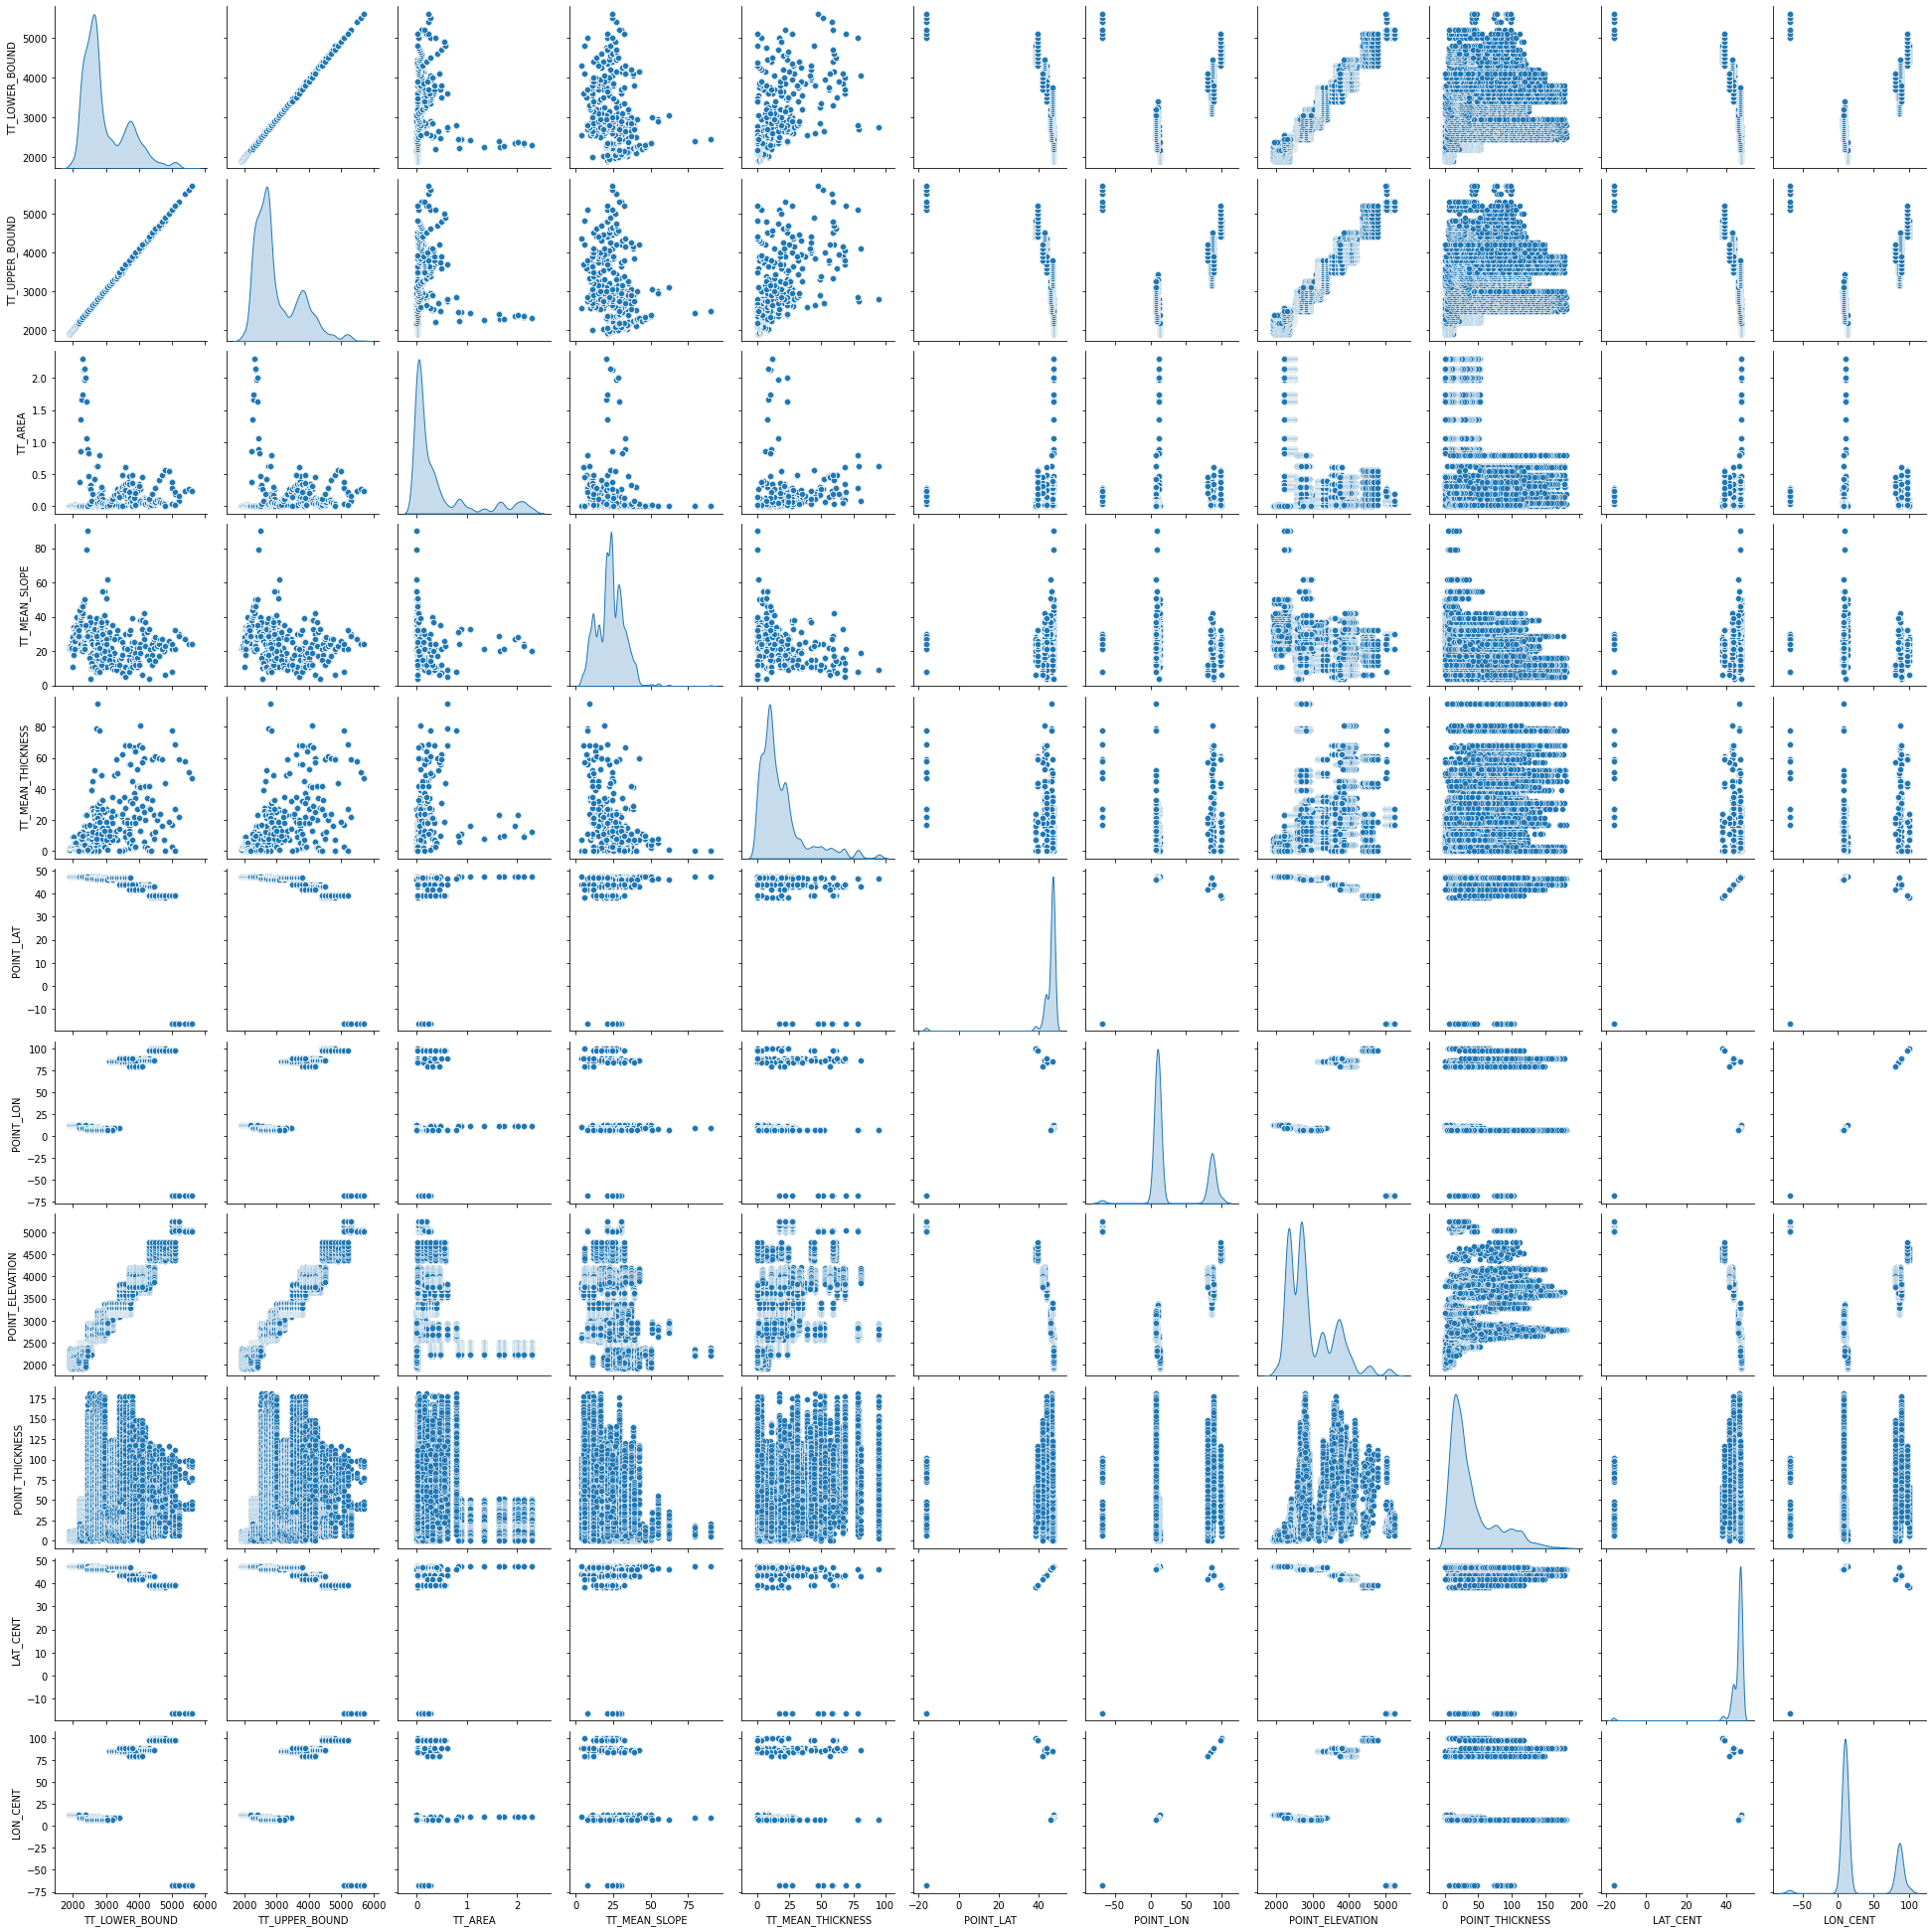

In [7]:
sns.pairplot(test_dataset[["TT_LOWER_BOUND",
                            "TT_UPPER_BOUND",
                            "TT_AREA",
                            "TT_MEAN_SLOPE",
                            "TT_MEAN_THICKNESS",
                            "POINT_LAT",
                            "POINT_LON",
                            "POINT_ELEVATION",
                            "POINT_THICKNESS",
                            "LAT_CENT",
                            "LON_CENT"]],
             diag_kind='kde')

In [8]:
#separate out features - what will be trained to predict desired attribute
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#define label - attribute training to be picked
train_labels = train_features.pop("POINT_THICKNESS")
test_labels = test_features.pop("POINT_THICKNESS")

train_features.describe().transpose()[['mean', 'std']]

,mean,std
GlaThiDa_ID,1242.974148,806.029590
TT_LOWER_BOUND,2955.358249,678.468683
TT_UPPER_BOUND,2997.584699,693.106394
TT_AREA,0.422969,0.635959
TT_MEAN_SLOPE,23.090475,9.025714
TT_MEAN_THICKNESS,18.129786,17.766370
LAT_CENT,45.256273,7.522679
LON_CENT,29.987470,36.351443
POINT_LAT,45.256439,7.523287
POINT_LON,29.988477,36.350408


In [9]:
#establish normalization layers
normalizer = {}
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in variable_list:

    normalizer[variable_name] = preprocessing.Normalization(input_shape=[1,], axis=None)
    normalizer[variable_name].adapt(np.array(train_features[variable_name]))
    
    
normalizer['ALL'] = preprocessing.Normalization(axis=-1)
normalizer['ALL'].adapt(np.array(train_features))

2022-03-11 15:31:09.903005: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-11 15:31:09.903049: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sermeq.ess.washington.edu): /proc/driver/nvidia/version does not exist
2022-03-11 15:31:09.903493: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
def build_linear_model(normalizer):
    model = tf.keras.Sequential([
        normalizer,
        layers.Dense(1)
    ])

    model.compile(
        optimizer=tf.optimizers.Adam(learning_rate=0.001),
        loss="mean_absolute_error")
    
    return model

def plot_single_model_variable(x, y,feature_name):
    plt.scatter(train_features[feature_name], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature_name)
    plt.ylabel("Avg Thickness (m)")
#     plt.xlim((0,20))
    plt.legend()
      
def plot_loss(history):
#     plt.subplots(figsize=(10,5))
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    #   plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)
    

In [11]:
test_results = {}
linear_model = {}
linear_history = {}
linear_results = {}

In [12]:
%%time
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in tqdm(variable_list):

    linear_model[variable_name] = build_linear_model(normalizer[variable_name])
    linear_history[variable_name] = linear_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    linear_results[variable_name] = linear_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

linear_results

100%|██████████| 10/10 [25:53<00:00, 155.32s/it]

CPU times: user 33min 2s, sys: 2min 6s, total: 35min 9s
Wall time: 25min 53s


{'TT_LOWER_BOUND': 20.663789749145508,
 'TT_UPPER_BOUND': 20.676647186279297,
 'TT_AREA': 23.564258575439453,
 'TT_MEAN_THICKNESS': 20.542211532592773,
 'TT_MEAN_SLOPE': 22.376747131347656,
 'POINT_LAT': 23.573179244995117,
 'POINT_LON': 19.265260696411133,
 'POINT_ELEVATION': 20.29163360595703,
 'LAT_CENT': 23.57335090637207,
 'LON_CENT': 19.264938354492188}

In [13]:
for variable_name in variable_list:    
    df = pd.DataFrame(linear_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


          Variable       loss   val_loss
99  TT_LOWER_BOUND  20.805149  20.650526

          Variable       loss   val_loss
99  TT_UPPER_BOUND  20.819067  20.661205

   Variable       loss   val_loss
99  TT_AREA  23.660847  23.426729

             Variable      loss   val_loss
99  TT_MEAN_THICKNESS  20.68672  20.521133

         Variable       loss   val_loss
99  TT_MEAN_SLOPE  22.500841  22.202436

     Variable       loss   val_loss
99  POINT_LAT  23.676662  23.445002

     Variable       loss   val_loss
99  POINT_LON  19.410805  19.159382

           Variable       loss   val_loss
99  POINT_ELEVATION  20.423639  20.224771

    Variable       loss  val_loss
99  LAT_CENT  23.676779  23.44495

    Variable       loss   val_loss
99  LON_CENT  19.410555  19.159098



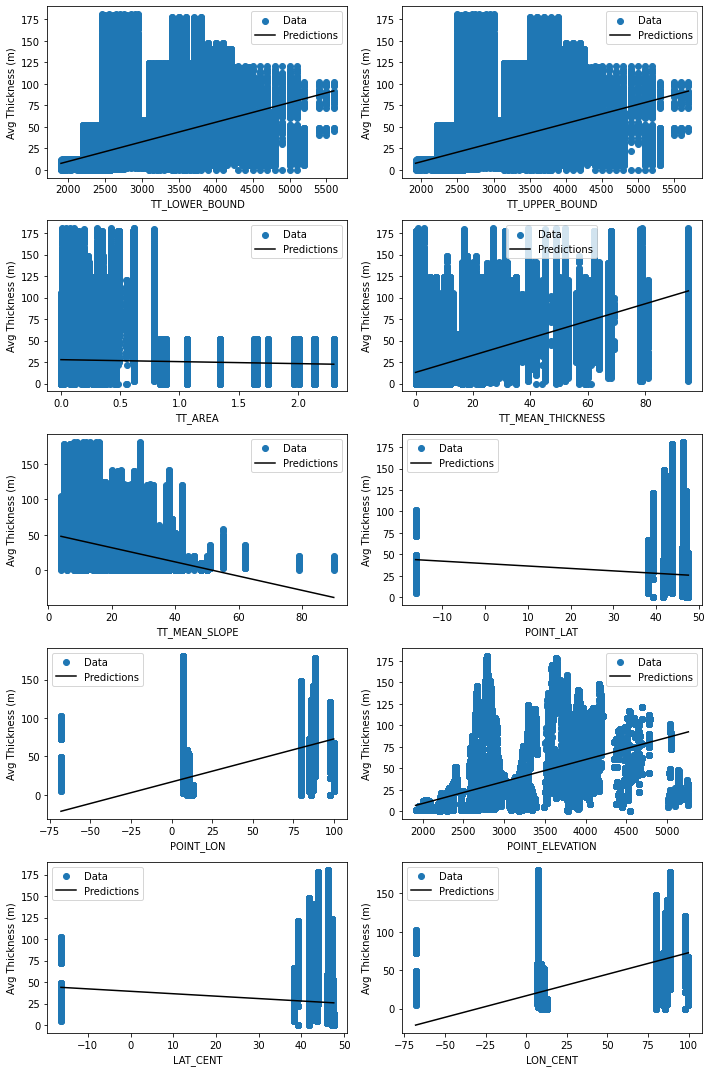

In [14]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = linear_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)
plt.tight_layout()

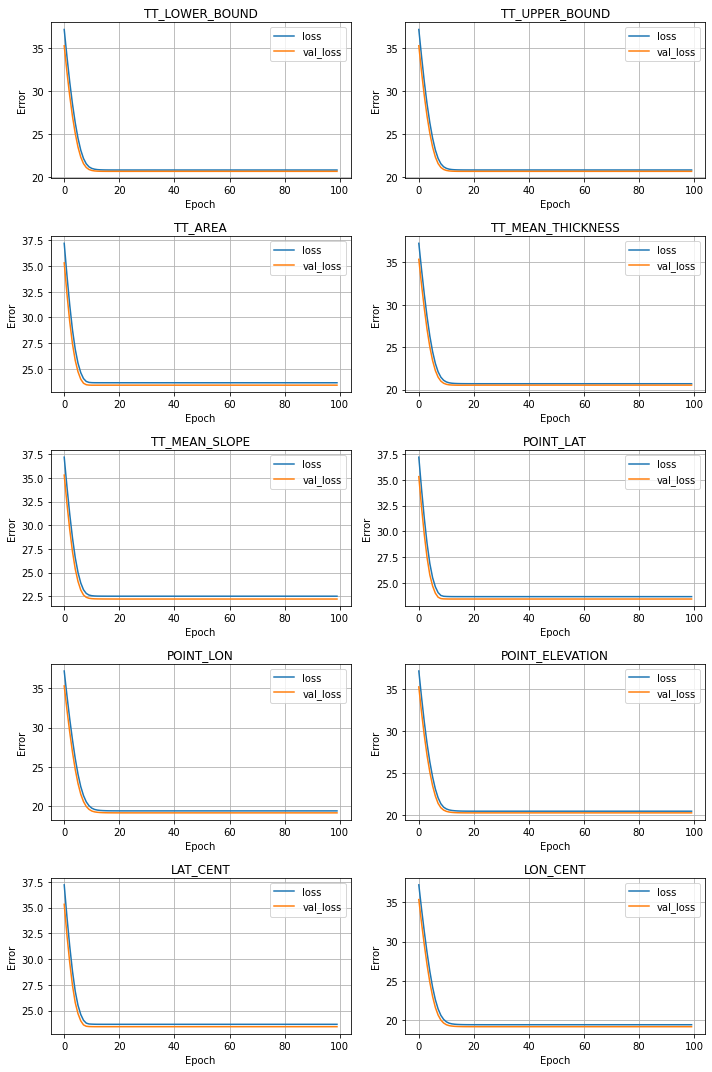

In [15]:
fig,ax=plt.subplots(8,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    ax = plt.subplot(5,2,i+1)

    plt.subplot(5,2,i+1)
    plot_loss(linear_history[variable_name])
    ax.set_title(variable_name)

plt.tight_layout()
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_loss.eps")

In [16]:
%%time
linear_model = build_linear_model(normalizer['ALL'])

linear_history_full = linear_model.fit(
train_features, train_labels,        
   epochs=100,
   verbose=0,
   validation_split = 0.2)

test_results["MULTI"] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results

CPU times: user 3min 23s, sys: 12.5 s, total: 3min 36s
Wall time: 2min 38s


{'MULTI': 17.16849708557129}

In [17]:
df = pd.DataFrame(linear_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable       loss   val_loss
99  Multi-Variable  17.330168  17.164227



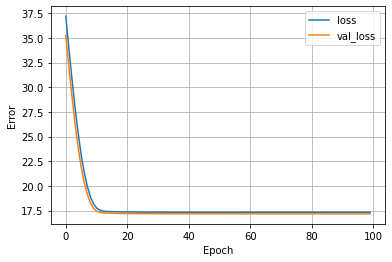

In [18]:
plot_loss(linear_history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_full_loss.eps")

In [19]:
def build_dnn_model(norm):
    model = keras.Sequential([
              norm,
              layers.Dense(64, activation='relu'),
              layers.Dense(64, activation='relu'),
              layers.Dense(1) ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

def dnn_test_results(feature_name):
    dnn_test_results[feature_name] = dnn_model.evaluate(
        test_features[feature_name],
        test_labels, verbose=0)

In [20]:
dnn_test_results = {}
dnn_model = {}
dnn_history = {}
dnn_results = {}
dnn_history_full = {}

In [21]:
%%time
variable_list = ("TT_LOWER_BOUND",
                 "TT_UPPER_BOUND",
                 "TT_AREA",
                 "TT_MEAN_THICKNESS",
                 "TT_MEAN_SLOPE",
                 "POINT_LAT",
                 "POINT_LON",
                 "POINT_ELEVATION",
                 "LAT_CENT",
                 "LON_CENT")
for variable_name in tqdm(variable_list):

    dnn_model[variable_name] = build_dnn_model(normalizer[variable_name])
    dnn_history[variable_name] = dnn_model[variable_name].fit(
                                        train_features[variable_name], train_labels,        
                                        epochs=100,
                                        verbose=0,
                                        validation_split = 0.2)
    dnn_results[variable_name] = dnn_model[variable_name].evaluate(
                                        test_features[variable_name],
                                        test_labels, verbose=0)

dnn_results

100%|██████████| 10/10 [51:41<00:00, 310.20s/it]

CPU times: user 7h 27min 49s, sys: 1h 39min 16s, total: 9h 7min 5s
Wall time: 51min 41s


{'TT_LOWER_BOUND': 18.90114402770996,
 'TT_UPPER_BOUND': 18.953807830810547,
 'TT_AREA': 19.587553024291992,
 'TT_MEAN_THICKNESS': 19.2275333404541,
 'TT_MEAN_SLOPE': 20.408748626708984,
 'POINT_LAT': 19.381942749023438,
 'POINT_LON': 15.294309616088867,
 'POINT_ELEVATION': 15.972448348999023,
 'LAT_CENT': 19.266437530517578,
 'LON_CENT': 15.293529510498047}

In [22]:
for variable_name in variable_list:    
    df = pd.DataFrame(dnn_history[variable_name].history)
    dfs = df.loc[[df.last_valid_index()]]
    dfs.insert(0, 'Variable', [variable_name])
    
    print(dfs)
    print("")


          Variable       loss   val_loss
99  TT_LOWER_BOUND  18.983971  18.708967

          Variable       loss   val_loss
99  TT_UPPER_BOUND  19.020275  18.767979

   Variable       loss   val_loss
99  TT_AREA  19.750448  19.638874

             Variable       loss   val_loss
99  TT_MEAN_THICKNESS  19.370001  19.313999

         Variable       loss  val_loss
99  TT_MEAN_SLOPE  20.546064  20.40308

     Variable       loss   val_loss
99  POINT_LAT  19.278578  19.321066

     Variable       loss   val_loss
99  POINT_LON  15.454275  15.341591

           Variable       loss   val_loss
99  POINT_ELEVATION  16.151493  15.855708

    Variable       loss   val_loss
99  LAT_CENT  19.313824  19.187181

    Variable       loss   val_loss
99  LON_CENT  15.490155  15.334892



In [23]:
dnn_results["TT_LOWER_BOUND"]

18.90114402770996

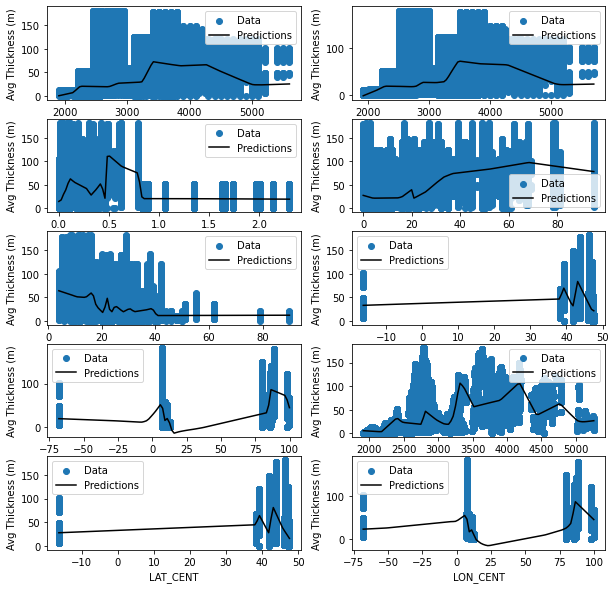

In [24]:
fig,ax=plt.subplots(5,2,figsize=(10,10))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    xmax = np.max(train_features[variable_name])
    xmin = np.min(train_features[variable_name])
    x = tf.linspace(xmin, xmax, 101)
    y = dnn_model[variable_name].predict(x)
    plot_single_model_variable(x,y,variable_name)

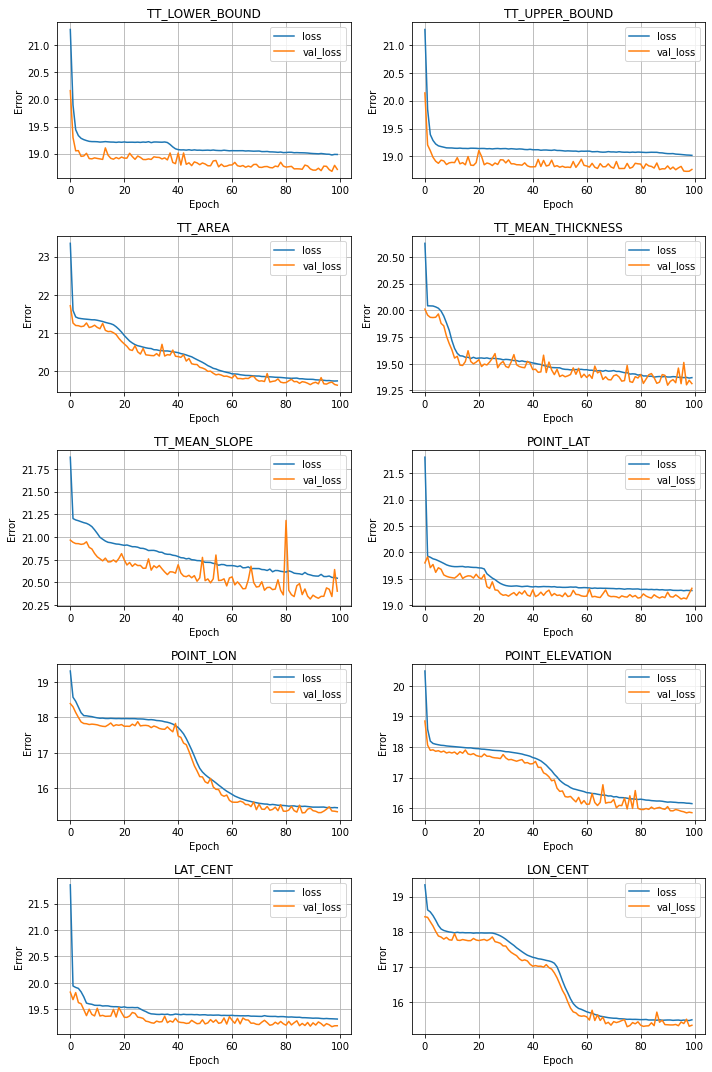

In [25]:
fig,ax=plt.subplots(5,2,figsize=(10,15))
for i, variable_name in enumerate(variable_list):
    plt.subplot(5,2,i+1)
    ax = plt.subplot(5,2,i+1)
    ax.set_title(variable_name)
    plot_loss(dnn_history[variable_name])
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_loss.eps")
plt.tight_layout()

In [26]:
dnn_full_model = build_dnn_model(normalizer['ALL'])

In [27]:
%%time
dnn_history_full = dnn_full_model.fit(
    train_features, train_labels,
    validation_split=0.2,
    verbose=0, 
    epochs=100)

CPU times: user 36min 5s, sys: 10min 26s, total: 46min 32s
Wall time: 5min 9s


In [28]:
df = pd.DataFrame(dnn_history_full.history)
dfs = df.loc[[df.last_valid_index()]]
dfs.insert(0, 'Variable', 'Multi-Variable')
    
print(dfs)
print("")


          Variable      loss  val_loss
99  Multi-Variable  8.783874  8.942403



In [29]:
plot_loss(history_full)
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_dnn_full_loss.eps")

NameError: name 'history_full' is not defined

In [ ]:
dnn_test_results["dnn_full_model"] = dnn_full_model.evaluate(
    test_features,
    test_labels, verbose=0)

dnn_test_results


In [ ]:
history_full.history

In [ ]:
len(test_results)

In [ ]:
y = dnn_full_model.predict(test_features)
plt.plot(test_labels,y,'.')
plt.plot((0,180),(0,180),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness(m)')
# plt.savefig("/home/sa42/notebooks/glac/figs/GTP2_res.EPS")

In [ ]:
predictions = pd.Series(dnn_full_model.predict(test_features).flatten())
testy_testy_test = pd.concat([test_labels,predictions],axis=1)
sns.displot(testy_testy_test, x=test_labels, y=predictions, kind="kde")


In [ ]:
len(predictions)

In [ ]:
len(test_labels)